
Based on Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow book, taken from https://github.com/ageron/handson-ml2/blob/master/14_deep_computer_vision_with_cnns.ipynb




In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)
print(y_train.shape)

(55000, 28, 28, 1)
(55000,)


9


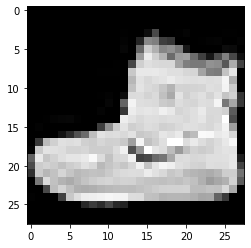

In [ ]:
_ = plt.imshow(X_train[0,:,:,0], cmap='gray')
print(y_train[0])

0


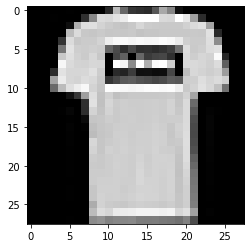

In [ ]:
_ = plt.imshow(X_train[1,:,:,0], cmap='gray')
print(y_train[1])

In [ ]:
model = keras.models.Sequential([
  keras.layers.Conv2D(64, 7, activation="relu", padding="same", input_shape=[28, 28, 1]),
  keras.layers.MaxPooling2D(2),
  keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
  keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
  keras.layers.MaxPooling2D(2),
  keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
  keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
  keras.layers.MaxPooling2D(2),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation="relu"),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(64, activation="relu"),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(10, activation="softmax")
])

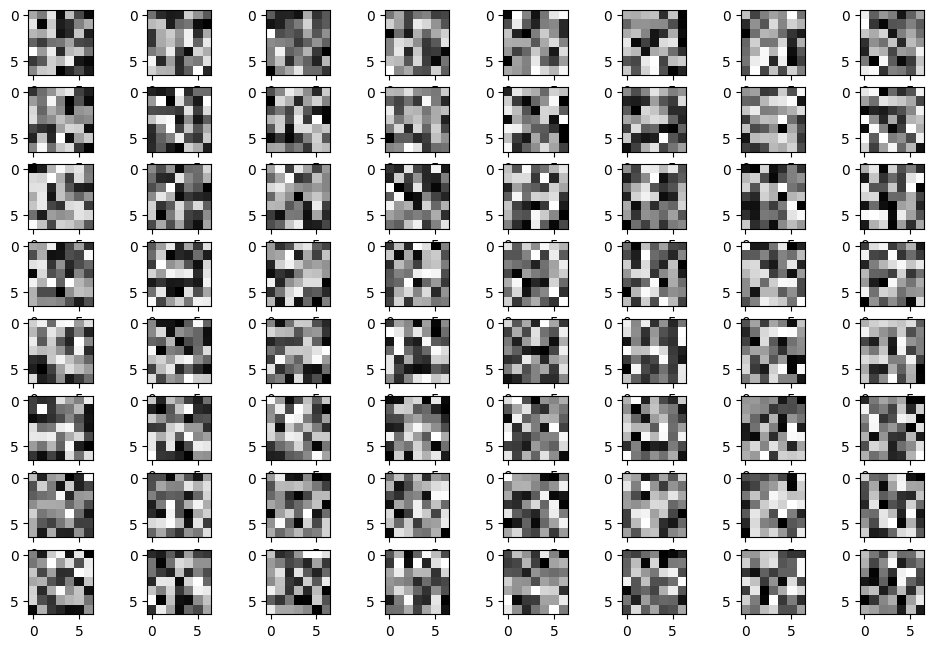

In [ ]:
weights = model.get_weights()
w0 = weights[0]
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
for i in range(64):
  _ = plt.subplot(8,8,i+1)
  _ = plt.imshow(w0[:,:,0,i], cmap='gray')

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)

Epoch 1/5
1719/1719 [==============================] - 25s 9ms/step - loss: 0.9635 - accuracy: 0.6530 - val_loss: 0.4882 - val_accuracy: 0.8318
Epoch 2/5
1719/1719 [==============================] - 15s 9ms/step - loss: 0.5410 - accuracy: 0.8137 - val_loss: 0.4269 - val_accuracy: 0.8588
Epoch 3/5
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4815 - accuracy: 0.8340 - val_loss: 0.3593 - val_accuracy: 0.8718
Epoch 4/5
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4368 - accuracy: 0.8484 - val_loss: 0.3643 - val_accuracy: 0.8670
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.3893 - accuracy: 0.8606


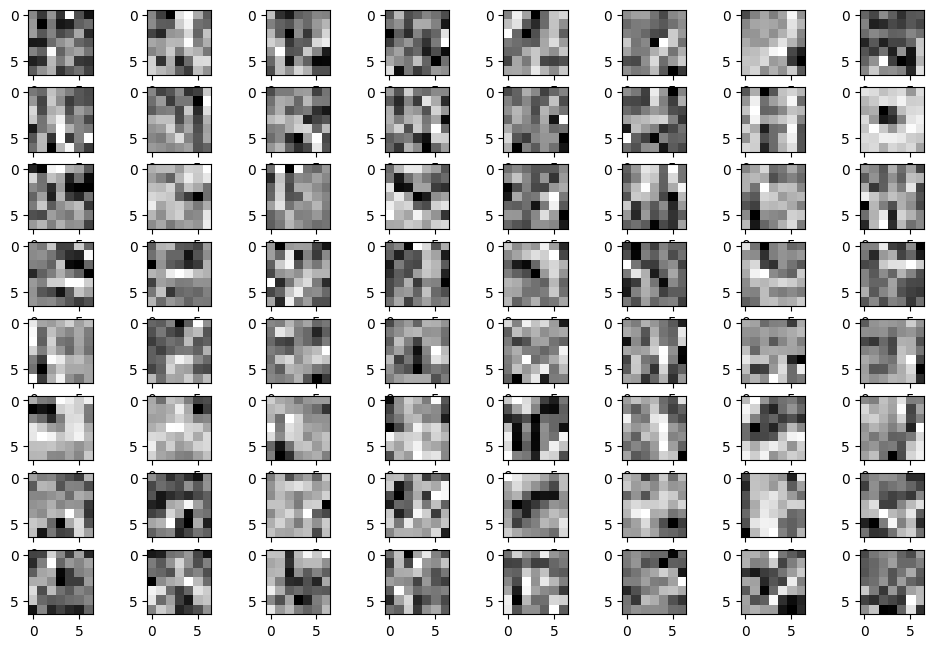

In [ ]:
weights = model.get_weights()
w0 = weights[0]
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
for i in range(64):
  _ = plt.subplot(8,8,i+1)
  _ = plt.imshow(w0[:,:,0,i], cmap='gray')


Tophat

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)         2